In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Dimensional Analysis </h1>
<h3 align="center"> Christine Zhang </h3>

---

In [30]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from metric_learn import NCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### tSNE

---

### All Data (Mutation, Copy Number, Gene Expression)

In [6]:
file_name = "datasets/cn_mut_exp_bin_pd"
file_object = open(file_name,'r')  
cn_mut_exp_bin_pd = pickle.load(file_object)
cn_mut_exp_bin_pd.head()

,1_x,503538_x,29974_x,2_x,144571_x,144568_x,3,53947_x,51146_x,100506677,...,Sites_pancreas,Sites_pleura,Sites_prostate,Sites_salivary_gland,Sites_skin,Sites_soft_tissue,Sites_stomach,Sites_thyroid,Sites_upper_aerodigestive_tract,Sites_urinary_tract
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,0,0,0,0,0,0,0,0,0,1
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,0,0,1,0,0,0,0,0,0,0
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,0,0,0,0,0,0,0,0,0,0
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,0,0,0,0,0,0,0,0,0,1
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0,0,0,0,0,0,0,0,0,0


In [7]:
unique_sites = np.sum(cn_mut_exp_bin_pd.columns.str.contains("Sites") == True)
sites_pd = cn_mut_exp_bin_pd.loc[:,cn_mut_exp_bin_pd.columns.str.contains("Sites")==True]
sites_lst = cn_mut_exp_bin_pd.loc[:,cn_mut_exp_bin_pd.columns.str.contains("Sites")==True].columns.values
sites_lst

array(['Sites_autonomic_ganglia', 'Sites_biliary_tract', 'Sites_bone',
       'Sites_breast', 'Sites_central_nervous_system', 'Sites_endometrium',
       'Sites_kidney', 'Sites_large_intestine', 'Sites_liver',
       'Sites_lung', 'Sites_oesophagus', 'Sites_ovary', 'Sites_pancreas',
       'Sites_pleura', 'Sites_prostate', 'Sites_salivary_gland',
       'Sites_skin', 'Sites_soft_tissue', 'Sites_stomach', 'Sites_thyroid',
       'Sites_upper_aerodigestive_tract', 'Sites_urinary_tract'], dtype=object)

In [8]:
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0, 1.0, unique_sites))

In [9]:
num_components = 100
def PCA_apply (dataframe):
    dataframe = dataframe.transpose()
    master_cclid = dataframe.as_matrix()
    pca = PCA(n_components = num_components)
    scaled_data = preprocessing.scale(master_cclid)
    pca.fit(scaled_data)    
    pca.transform(scaled_data)
    pca_components_pd = pd.DataFrame(data = pca.components_, columns = dataframe.columns.values).transpose()
    pca_components = pca_components_pd.as_matrix()
    print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
    print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)
    return pca_components

In [10]:
cn_mut_exp_pd = cn_mut_exp_bin_pd.drop(sites_lst, axis = 1)
cn_mut_exp_pca = PCA_apply (cn_mut_exp_pd)
sites_add = np.transpose(sites_pd.as_matrix())
cn_mut_exp_pca_full = np.insert(cn_mut_exp_pca, num_components, sites_add, axis = 1)

Amount of Variance explained by each component:  [  9.68655481e-01   3.02055156e-03   1.57537083e-03   8.78368455e-04
   7.92221570e-04   6.95335134e-04   5.76632775e-04   5.30394329e-04
   4.83286352e-04   4.14068815e-04   3.72599670e-04   3.40415735e-04
   3.27453387e-04   3.10571665e-04   2.99124573e-04   2.91717317e-04
   2.71855233e-04   2.64545744e-04   2.54331264e-04   2.41715678e-04
   2.39401405e-04   2.36146565e-04   2.27508842e-04   2.15487445e-04
   2.05532843e-04   2.01193817e-04   1.88324861e-04   1.84065031e-04
   1.80901488e-04   1.77469040e-04   1.69981386e-04   1.68863931e-04
   1.67103971e-04   1.63771749e-04   1.58102631e-04   1.57089447e-04
   1.51632393e-04   1.50052446e-04   1.48219911e-04   1.44754362e-04
   1.39709806e-04   1.36049947e-04   1.34590555e-04   1.33767984e-04
   1.30967503e-04   1.27579050e-04   1.25086730e-04   1.24102381e-04
   1.22494941e-04   1.20088304e-04   1.18891963e-04   1.18131834e-04
   1.14748647e-04   1.13569873e-04   1.11743083e-04   

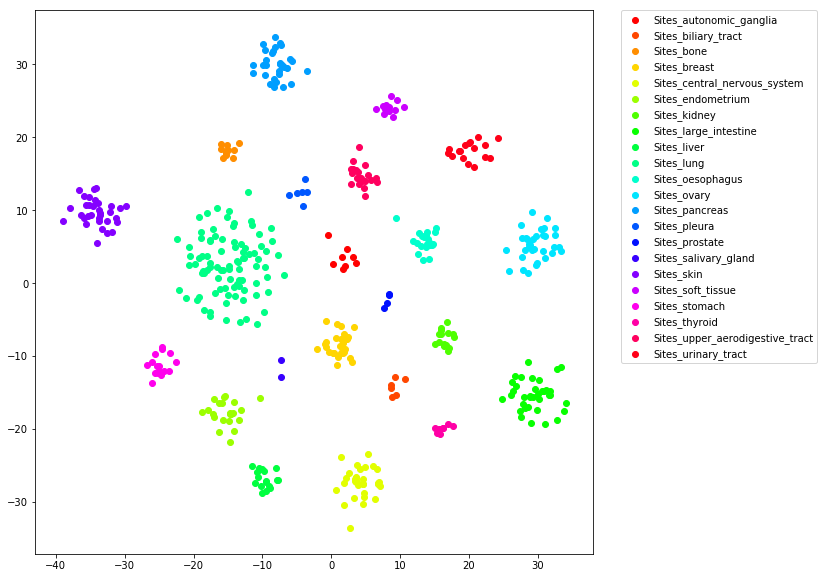

In [18]:
def plot_tsne(dataset):
    plt.figure(figsize=(10,10))
    all_tsne = TSNE(n_components=2).fit_transform(dataset)
    for index, site in enumerate(sites_lst):
        filtered_pd = np.array(dataset[:,np.shape(dataset)[1] - len(sites_lst) + index] == 1)
        indices_lst = [i for i, val in enumerate(filtered_pd) if val == True]
        filtered_embedded = all_tsne[indices_lst]
        plt.scatter(filtered_embedded[:,0], filtered_embedded[:,1], color = colors[index], label = site)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return all_tsne
    
all_tsne_data = plot_tsne(cn_mut_exp_pca_full)

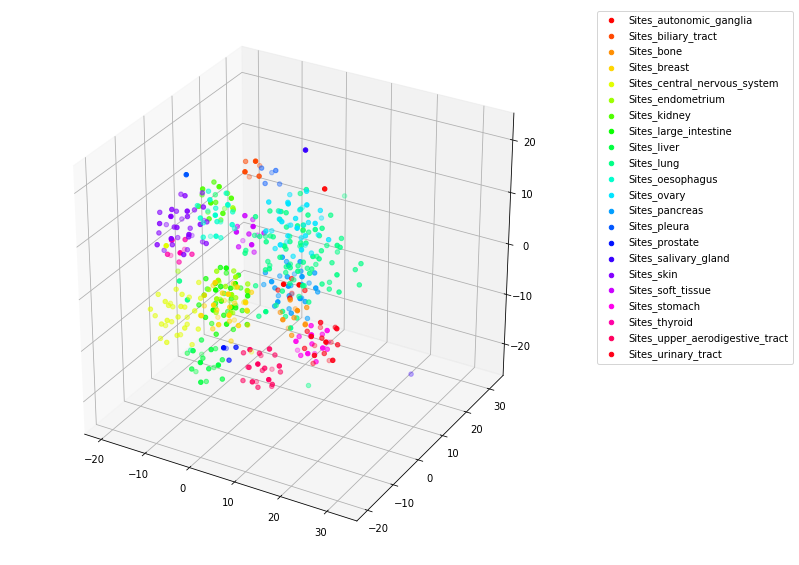

In [39]:
def plot_tsne_3D(dataset):
    plt.figure(figsize=(10,10))
    all_tsne = TSNE(n_components=3).fit_transform(dataset)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for index, site in enumerate(sites_lst):
        filtered_pd = np.array(dataset[:,np.shape(dataset)[1] - len(sites_lst) + index] == 1)
        indices_lst = [i for i, val in enumerate(filtered_pd) if val == True]
        filtered_embedded = all_tsne[indices_lst]
        ax.scatter(filtered_embedded[:,0], filtered_embedded[:,1],filtered_embedded[:,2], color = colors[index], label = site)
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return all_tsne
    
all_tsne_data_3D = plot_tsne_3D(cn_mut_exp_pca_full)

In [22]:
file_name = "datasets/auc_lst"
file_object = open(file_name,'r')  
auc_lst = pickle.load(file_object)

In [23]:
svr_rbf = SVR(kernel = "rbf")
svr_lin = SVR(kernel = "linear")
rf = RandomForestRegressor()

# test naive models
def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

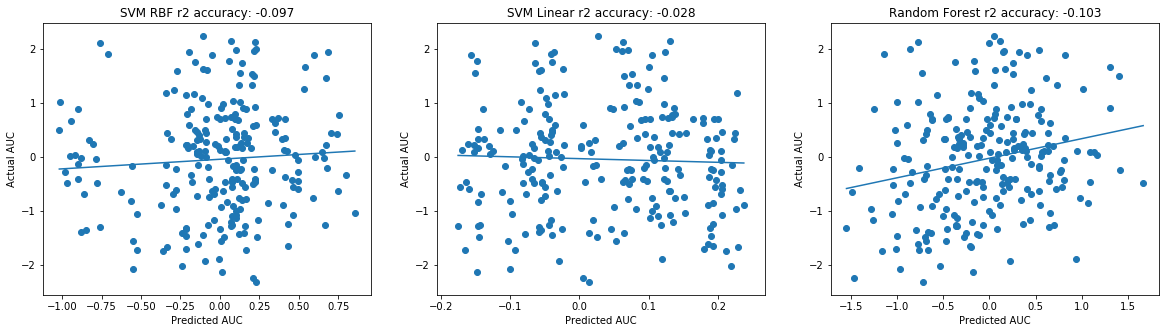

In [27]:
all_tsne_scaled = preprocessing.scale(all_tsne_data)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_tsne_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[1] = draw_plot (ax[1], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", r2_rf)

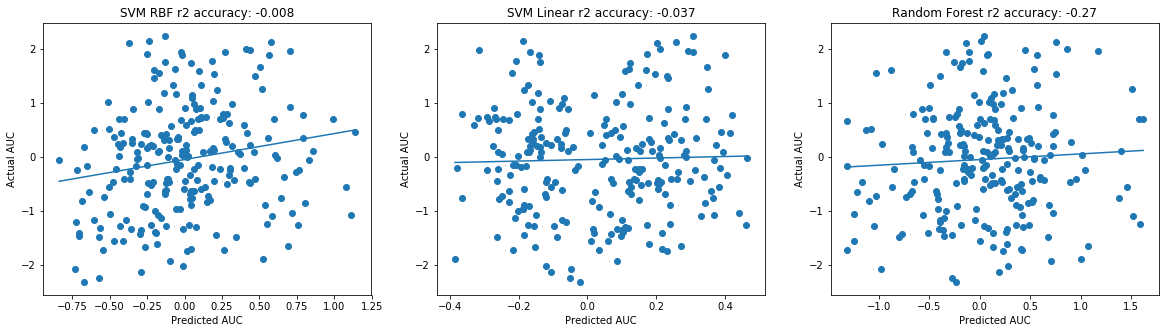

In [40]:
all_tsne_scaled = preprocessing.scale(all_tsne_data_3D)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_tsne_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[1] = draw_plot (ax[1], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", r2_rf)

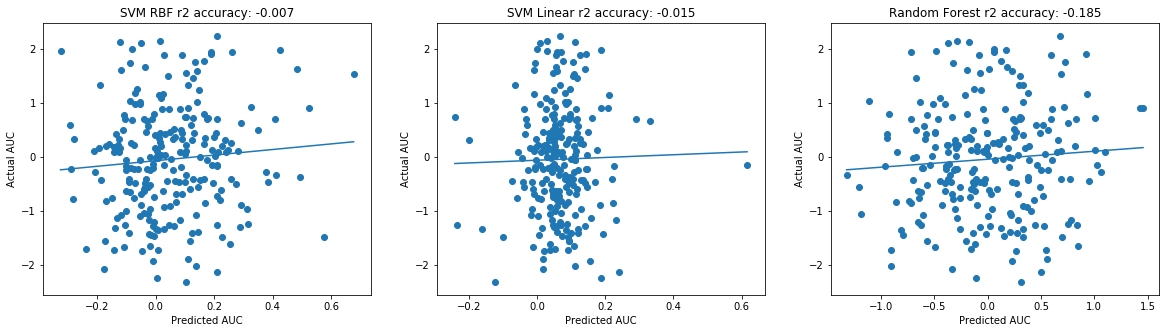

In [46]:
all_tsne_4D = TSNE(n_components=4).fit_transform(cn_mut_exp_pca_full)

all_tsne_scaled = preprocessing.scale(all_tsne_4D)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_tsne_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[1] = draw_plot (ax[1], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", r2_rf)

### Just Gene Expression Data

In [12]:
geneexp_expand_pd = pd.read_csv('datasets/gene_exp_precise.csv', sep =",")
geneexp_expand_pd.rename(columns={'0': 'Entrez_id'}, inplace=True)
geneexp_expand_pd["Entrez_id"] = geneexp_expand_pd.Entrez_id.astype(int)
geneexp_expand_pd.set_index('Entrez_id', inplace=True)
geneexp_pd = geneexp_expand_pd.transpose()
entrez_id_lst = geneexp_pd.index
geneexp_pd.head()

Entrez_id,100009676,10000,10001,10002,10003,100048912,10004,10005,10006,10007,...,9989,998,9990,9991,9992,9993,9994,9997,999,9
3,5.979812,6.595651,9.663415,4.040661,4.159523,4.099417,4.518963,8.236260,8.543386,10.146590,...,10.824800,5.366379,6.102796,7.611540,4.590955,7.164869,7.092268,9.638273,8.372508,7.915253
7,6.079415,4.521625,8.845639,3.768181,4.044822,4.151676,4.201540,7.922227,9.147535,8.564433,...,8.963671,5.304978,5.231049,8.704089,4.505268,6.679857,9.262698,10.335640,9.852547,10.535870
10,5.373842,6.631749,10.001350,3.610522,4.242035,3.859894,4.561051,8.697279,8.833257,8.895942,...,10.669690,6.068712,5.735501,8.380994,4.505418,6.530644,8.844877,9.305898,4.312173,8.105601
15,6.025009,7.510764,9.289334,3.685390,3.656942,4.138587,4.599801,8.492029,9.341341,9.578695,...,10.812790,5.128864,6.746001,8.342509,4.533303,6.942694,8.538819,8.043184,11.278580,8.478392
16,5.444892,7.544216,8.715909,4.173643,3.663081,4.069507,4.523500,7.735855,9.247934,10.152180,...,9.648020,4.942413,5.591168,8.207547,4.719897,6.646730,8.307294,9.801101,4.339788,8.283828


In [13]:
auc_pd = pd.read_csv('dataset1.csv', skiprows = [0,1], sep =",", 
                          names = ["Cclid", "Cellline", "Sites", "Histology", "Subhistology", "Culture", "SNP", "AUC"])
auc = auc_pd.as_matrix()
auc_pd.head()

# apply binary one hot encoding
def binary_one_hot (dataframe): 
    sites_lst = []
    for index, val in enumerate(auc_pd["Cclid"]):
        if str(val) in list(dataframe.index):
            sites_lst.append(auc_pd.loc[index,"Sites"])
    dataframe["Sites"] = sites_lst
    
    dataframe_binary_pd = pd.get_dummies(dataframe)
    dataframe_binary = dataframe_binary_pd.as_matrix()

    return dataframe_binary, dataframe_binary_pd

In [14]:
gene_bin_exp, gene_exp_bin_pd = binary_one_hot(geneexp_pd)
gene_exp_bin_pd.head()

,100009676,10000,10001,10002,10003,100048912,10004,10005,10006,10007,...,Sites_pancreas,Sites_pleura,Sites_prostate,Sites_salivary_gland,Sites_skin,Sites_soft_tissue,Sites_stomach,Sites_thyroid,Sites_upper_aerodigestive_tract,Sites_urinary_tract
3,5.979812,6.595651,9.663415,4.040661,4.159523,4.099417,4.518963,8.236260,8.543386,10.146590,...,0,0,0,0,0,0,0,0,0,1
7,6.079415,4.521625,8.845639,3.768181,4.044822,4.151676,4.201540,7.922227,9.147535,8.564433,...,0,0,1,0,0,0,0,0,0,0
10,5.373842,6.631749,10.001350,3.610522,4.242035,3.859894,4.561051,8.697279,8.833257,8.895942,...,0,0,0,0,0,0,0,0,0,0
15,6.025009,7.510764,9.289334,3.685390,3.656942,4.138587,4.599801,8.492029,9.341341,9.578695,...,0,0,0,0,0,0,0,0,0,1
16,5.444892,7.544216,8.715909,4.173643,3.663081,4.069507,4.523500,7.735855,9.247934,10.152180,...,0,0,0,0,0,0,0,0,0,0


In [15]:
gene_exp_pd = gene_exp_bin_pd.drop(sites_lst, axis = 1)
gene_exp_pca = PCA_apply (gene_exp_pd)
sites_add = np.transpose(sites_pd.as_matrix())
gene_exp_pca_full = np.insert(gene_exp_pca, num_components, sites_add, axis = 1)

Amount of Variance explained by each component:  [  8.75009200e-01   1.46400504e-02   7.55834659e-03   3.99892239e-03
   3.53292662e-03   3.11883160e-03   2.70719458e-03   2.40870760e-03
   2.09822975e-03   1.91912298e-03   1.60350080e-03   1.50193045e-03
   1.39000832e-03   1.22415549e-03   1.12378156e-03   1.09082609e-03
   1.02644708e-03   9.88244142e-04   9.58836078e-04   9.01693835e-04
   8.57132454e-04   8.38387744e-04   7.93341224e-04   7.90282560e-04
   7.49282285e-04   7.33094251e-04   6.92996403e-04   6.73114368e-04
   6.49456497e-04   6.34701040e-04   6.29926895e-04   6.04058062e-04
   6.00704371e-04   5.92774122e-04   5.55926379e-04   5.51143457e-04
   5.36371316e-04   5.31778788e-04   5.10541473e-04   5.02000528e-04
   4.95897553e-04   4.89723242e-04   4.71213842e-04   4.62678242e-04
   4.52459136e-04   4.47982064e-04   4.41735375e-04   4.33933328e-04
   4.24227488e-04   4.17334228e-04   4.13750849e-04   4.02598861e-04
   3.97932342e-04   3.96213542e-04   3.89990626e-04   

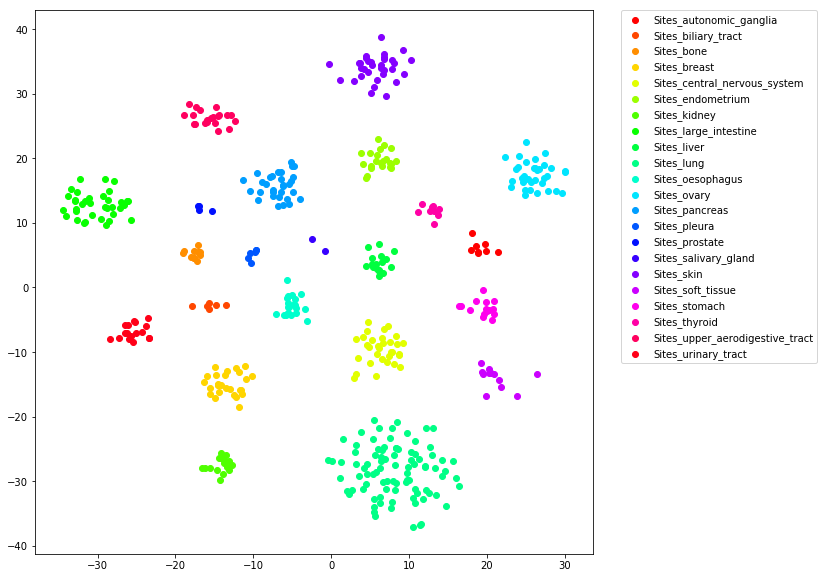

In [28]:
gene_exp_tsne_data = plot_tsne(gene_exp_pca_full)

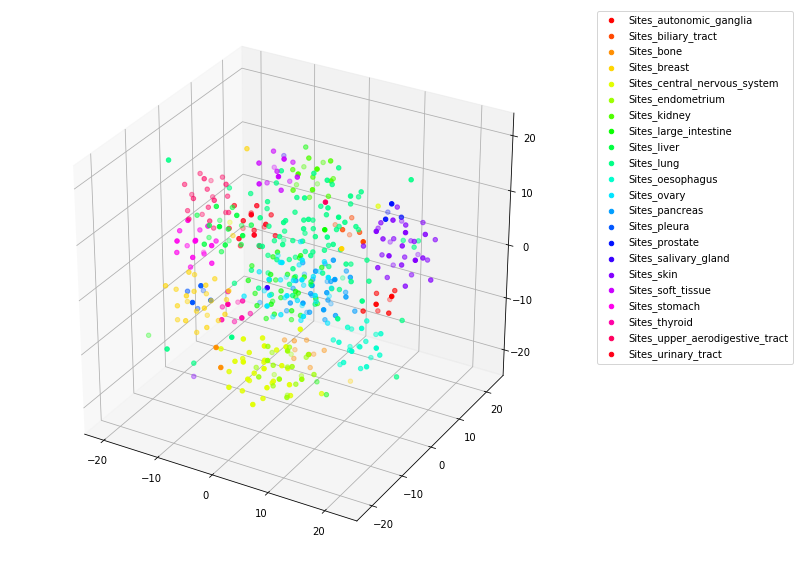

In [47]:
gene_exp_tsne_data_3D = plot_tsne_3D(gene_exp_pca_full)

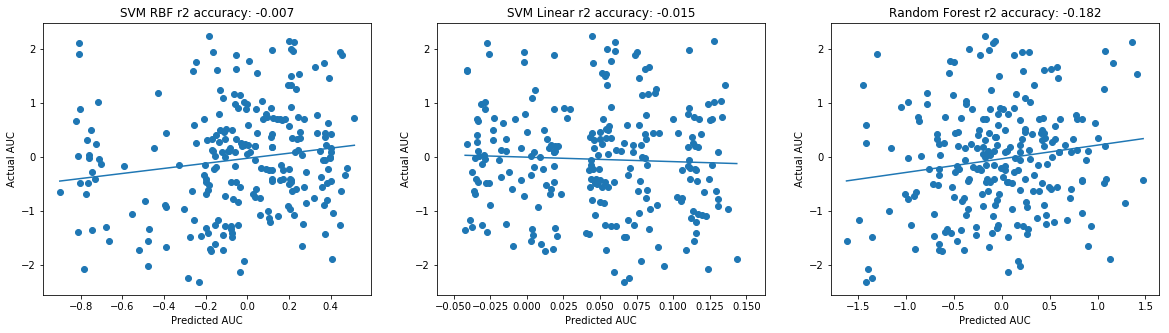

In [29]:
gene_exp_tsne_scaled = preprocessing.scale(gene_exp_tsne_data)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(gene_exp_tsne_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[1] = draw_plot (ax[1], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", r2_rf)

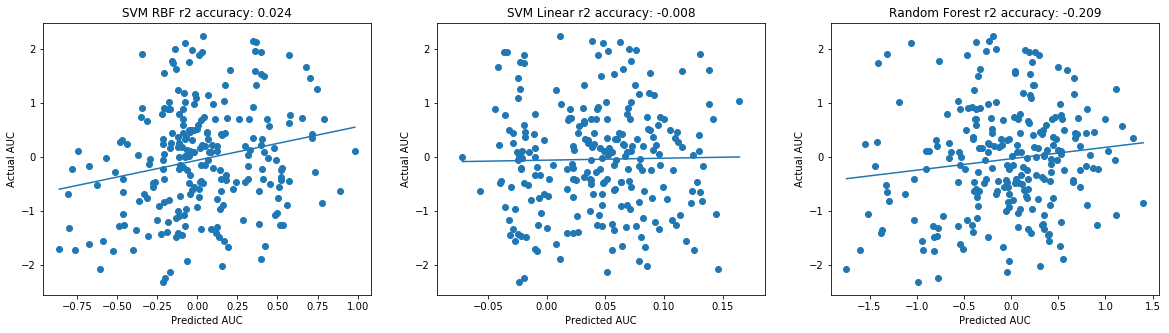

In [48]:
gene_exp_tsne_scaled = preprocessing.scale(gene_exp_tsne_data_3D)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(gene_exp_tsne_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[1] = draw_plot (ax[1], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", r2_rf)

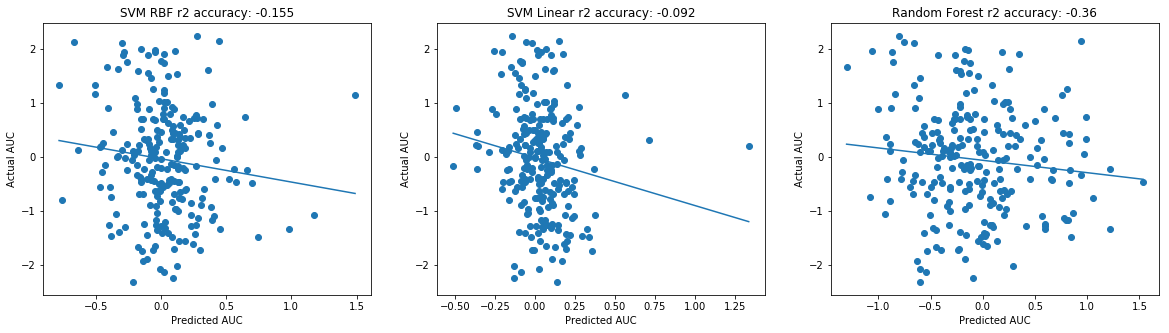

In [49]:
all_tsne_4D = TSNE(n_components=4).fit_transform(gene_exp_pca_full)

all_tsne_scaled = preprocessing.scale(all_tsne_4D)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_tsne_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[1] = draw_plot (ax[1], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", r2_rf)